## Import Required Filed

In [1]:
import cv2 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import collections
import pandas as pd
import math
import plotly.express as px   #pip install plotly
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import imutils

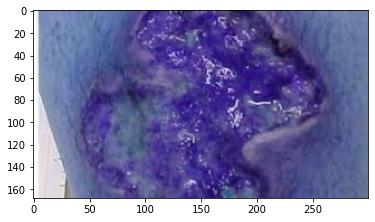

In [296]:
#Reading Image
img = cv2.imread('wound4.jpeg')
plt.imshow(img)
plt.show()

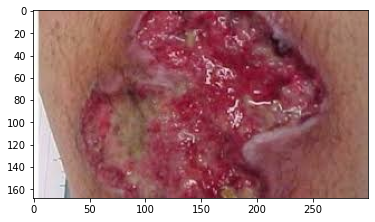

In [297]:
#Convering from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()



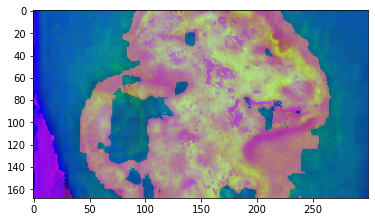

In [298]:
#Converting RGB to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.show()

In [299]:
#Finding Upper and Lower Limit
lower = np.array([155,25,0])    #correct values 
upper = np.array([179,255,255])   #correct values 

# Wound 1
#lower = np.array([0,162,23])    #correct values 
#upper = np.array([179,255,255])   #correct values 

# Wound 2
#lower = np.array([127,36,0])    #correct values 
#upper = np.array([179,255,255])   #correct values 

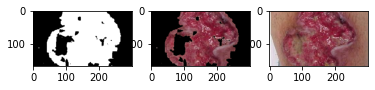

In [300]:
#Masking 
mask = cv2.inRange(img_hsv, lower, upper)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.show()

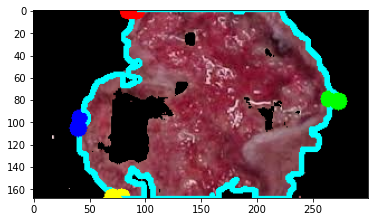

In [306]:
# Drawing the Contour
image = result
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
# show the output image
plt.imshow( image)
plt.show()

In [305]:
#Calculating the area of the Contour
print("Contour Area : ", cv2.contourArea(cnts[0]))

Contour Area :  29759.0
